In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import glob
import xesmf as xe


in_situ_path = '/home/disk/pna2/aodhan/insitu_surface_products/'

gistemp = xr.open_dataset(in_situ_path + 'gistemp1200_GHCNv4_ERSSTv5.nc')#.tempanomaly.values[-515:-83]
era5 = xr.open_dataset(in_situ_path + 'ERA5_TAS_monthly_1979_2014.nc')#.t2m.valuesls
hadcrut = xr.open_dataset(in_situ_path + 'HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')#.tas_mean.values[-515:-83]
noaa = xr.open_dataset(in_situ_path + 'NOAAGlobalTemp_v5.0.0_gridded_s188001_e202111_c20211210T133255.nc')#.anom.values[-515:-83]

ds_out = xe.util.grid_2d(-180.0, 180.0, 2.5, -90.0, 90.0, 2.5)

regridder_gistemp = xe.Regridder(gistemp, ds_out, 'bilinear', periodic=True)
gistemp_rg = regridder_gistemp(gistemp.tempanomaly)

In [ ]:
gistemp

: 

In [ ]:
print(np.shape(era5.t2m))

plt.contourf(era5.t2m[0])

: 

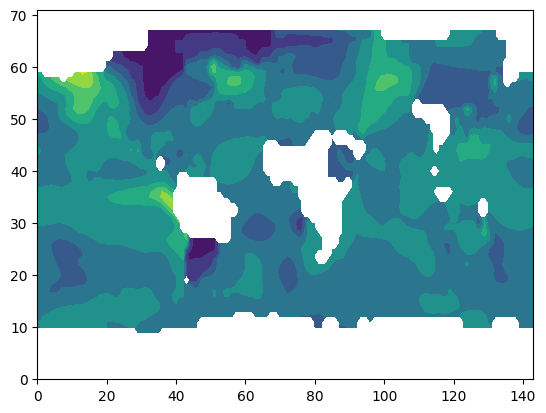

In [75]:
plt.contourf(gistemp_rg[100])

In [55]:
def regridder():
    InputGrid = TrendDictionary[model]['grid']
    OutputGrid = {"lon": np.arange(1.25, 358.751, 2.5), "lat": np.arange(-88.75, 88.751, 2.5)}
    regridder = xe.Regridder(InputGrid, OutputGrid, "bilinear")
    models_for_training_count +=1

    # regrid the trend maps for each ensemble member and time period
    EnsembleTrendsArray = []
    for ensemble_name in TrendDictionary[model].keys():
        # data is stored with first element as grid of model
        if ensemble_name == 'grid':
            continue

        ensemble_member = TrendDictionary[model][ensemble_name]

        # return the timeperiods and trend maps in ensemble_member dictionary
        result = ensemble_member.items()
        data = np.array(list(result))
        timeperiods = data[:,0]
        timeperiods = np.array([list(period) for period in timeperiods]) # we will use this as indices for NetCDF
        trend_maps = data[:,1] # these are the indivisual 19 year trend maps

        # Regrid trend map to 2.5 x 2.5 grid
        trend_maps_2p5x2p5 = [regridder(trend_maps[i]) for i in range(0, len(trend_maps))]

<xarray.Dataset>
Dimensions:  (time: 1703, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2021-11-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P141Y11M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
 

In [10]:
era5

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 432)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2014-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-25 18:56:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...